### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Load_DataSet

In [2]:
glass_df = pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\DS_CareeR\NuCoT_TraininG\noTES\Machine Learning\Supervised Learning\Classification\glass_knn.csv")

### Examine_DataSet

In [3]:
glass_df.shape

(214, 10)

In [4]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass_df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
glass_df['Type'].value_counts()


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [9]:
glass_df[glass_df.Type == 1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


### Data _ PreprocessinG

In [10]:
X = glass_df.drop(['Type'],axis = 1)
Y = glass_df[['Type']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [11]:
# Print the shapes of training and testing data arrays
print(f'shape of X_train = {X_train.shape},\nshape of X_test = {X_test.shape} ,\nshape of Y_train = {Y_train.shape},\nshape of Y_test = {Y_test.shape}')

shape of X_train = (171, 9),
shape of X_test = (43, 9) ,
shape of Y_train = (171, 1),
shape of Y_test = (43, 1)


### Knn _ Classifier

In [12]:
Knn = KNeighborsClassifier(n_neighbors = 9)
Knn.fit(X_train,Y_train)

C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [13]:
Y_Pred = Knn.predict(X_test)
Y_Pred

array([7, 1, 2, 1, 5, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 1, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 7, 2, 2, 2],
      dtype=int64)

### Model_Evaluation

In [14]:
print('Accuracy_of_Model :', Knn.score(X_test,Y_test))

Accuracy_of_Model : 0.5813953488372093


In [15]:
cm=confusion_matrix(Y_test,Y_Pred)
cm

array([[ 6,  3,  0,  0,  0,  0],
       [ 7, 12,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  5]], dtype=int64)

In [16]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

           1       0.30      0.67      0.41         9
           2       0.75      0.63      0.69        19
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.58        43
   macro avg       0.51      0.52      0.50        43
weighted avg       0.58      0.58      0.56        43



C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Text(50.722222222222214, 0.5, 'actual')

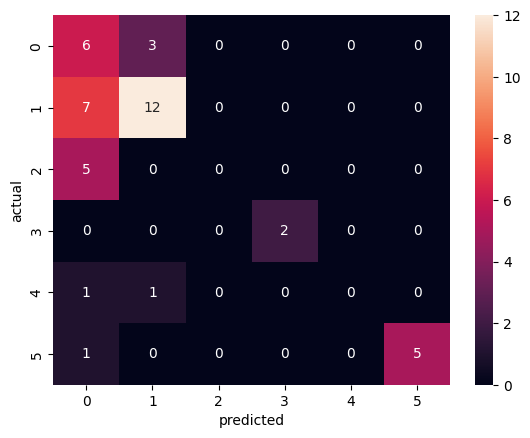

In [17]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')